Shape of the data: (1000, 2)
[1 1 1 0 1]


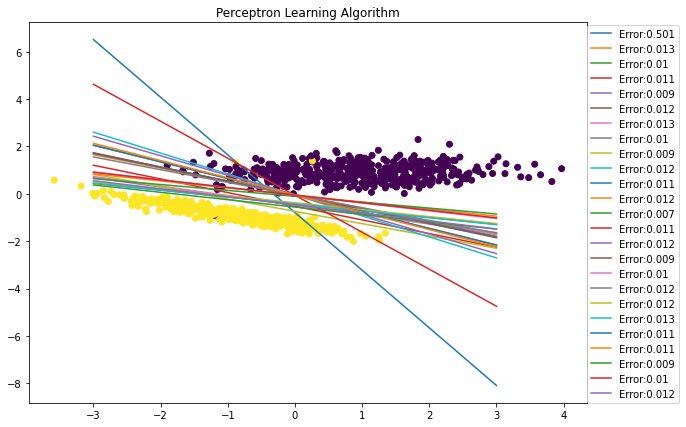

In [1]:
# Perceptron algorithm
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
fig,ax=plt.subplots(figsize=(10,7))
np.random.seed(123)
r=0.2 # learning rate, for updating the weights,you can take 1 if you want r should be greater than 0

# generate some fake binary classification data to demonstrate the perceptron learning algorithm
# this is the most basic algorithm such that a machine learning practitioner should learn
# before dive into more complex algorithm
X,y=make_classification(n_samples=1000, n_features=2,n_redundant=0, n_classes=2,random_state=123,
                        class_sep=0.9,n_clusters_per_class=1)
print("Shape of the data:",X.shape)
print(y[:5])

# creating the perceptron algorithm
# initialize a random weights,w0,w1,w2 i.e x1*w1+x2*w2+w0=0 is the hyperplane
# w2*x2=-x1*w1-w0
# x2=-x1*w1/w2-w0/w2
w=np.random.random(size=(3,)) # w[0] =w1,w[1]=w2,w[2]=w0

error=np.sum(y)/len(y) # initialize error ,just to the sum of the values in y
maxiter=120 # maximum number of iterations ,also called number of epochs

# plot the hyperplane as well as data
plt.scatter(X[:,0],X[:,1],c=y) # 
xx=np.linspace(-3,3,20) # evenly spaced 20 points,will be used to plot the hyperplane
plt.plot(xx,(-xx*w[0]/w[1])-(w[2]/w[1]),label="Error:"+str(error)) # hyperplane

# iterate until convergence
for epoch in range(maxiter):
  predictions=[]
  # iterate over training examples
  for i,xi in enumerate(X):
    label=y[i] # extract the label value
    # append 1 to xi at the end ,this is for w0
    xi=xi.tolist()
    xi.append(1)
    xi=np.asarray(xi)
    z=np.dot(w,xi) # dot product between w and xi

    # get the predicted class 
    label_pred=(0 if z>0 else 1)
    predictions.append(label_pred)

    # now update the weight
    w=w+r*(label_pred-label)*xi # weight will only be updated if label_pred is different from label(true value)
  if epoch%5==0:
    # calculate classification error
    error=np.sum(np.absolute(np.array(predictions)-y))/len(y)
    # now again, plot the hyperplane
    plt.plot(xx,(-xx*w[0]/w[1])-(w[2]/w[1]),label="Error:"+str(error))

plt.legend(loc=(1,0))
plt.title("Perceptron Learning Algorithm")
plt.show()